# Apresentação:

    Dado que conseguimos construir extrair os dados para mysql, vamos agora importar
    e brincar com os gráficos.

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import mysql.connector
from matplotlib import pyplot as plt

# Fazendo a conexão:

    Para construir os dados, vamos fazer a conexão.

In [3]:
# Fazendo a conexão:
mydb = mysql.connector.connect(
  host="localhost",
  user="bd_project",
  password="*****",
)

# Instanciando Objeto:
cursor = mydb.cursor()

In [83]:
# Checando banco de dados:
cursor.execute("SHOW DATABASES")

# Obtendo os resultados da consulta:
schemas = cursor.fetchall()

# Imprimindo os schemas:
for schema in schemas:
    print(schema[0])

aerossol_database
azure_company
bd_aerossol
cinema
information_schema
l3_vfm_a1
l3_vfm_a2
l3_vfm_a3
l3_vfm_a4
l3_vfm_a5
mysql
performance_schema
sys
trabalho_bd1
viagens


In [84]:
# Databases:
schemas = [schema[0] for schema in schemas if "l3_vfm" in schema[0]];schemas

['l3_vfm_a1', 'l3_vfm_a2', 'l3_vfm_a3', 'l3_vfm_a4', 'l3_vfm_a5']

## Aerosol_type

C:\Users\amori\AppData\Local\Temp\ipykernel_17092\510178755.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


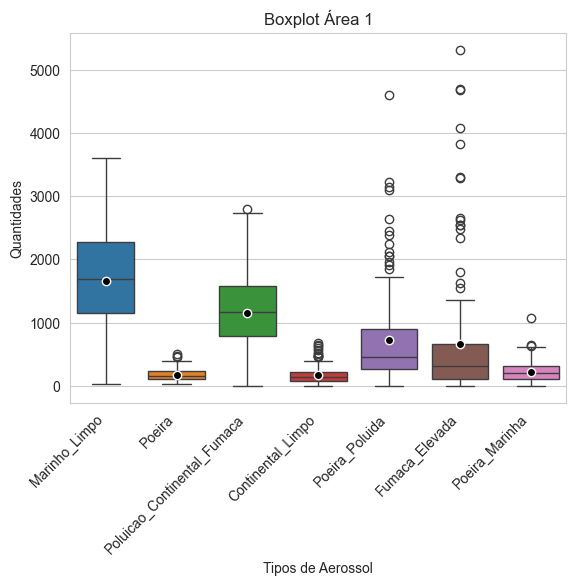

C:\Users\amori\AppData\Local\Temp\ipykernel_17092\510178755.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


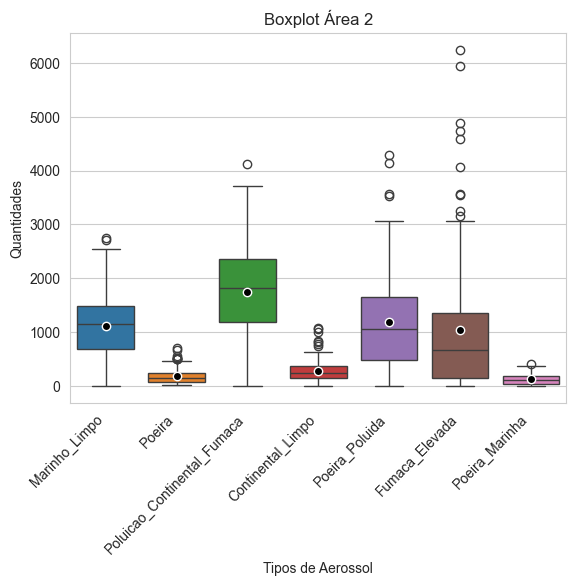

C:\Users\amori\AppData\Local\Temp\ipykernel_17092\510178755.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


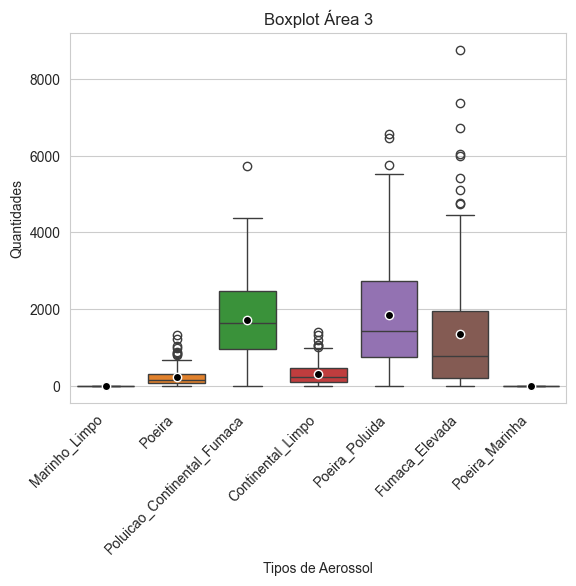

C:\Users\amori\AppData\Local\Temp\ipykernel_17092\510178755.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


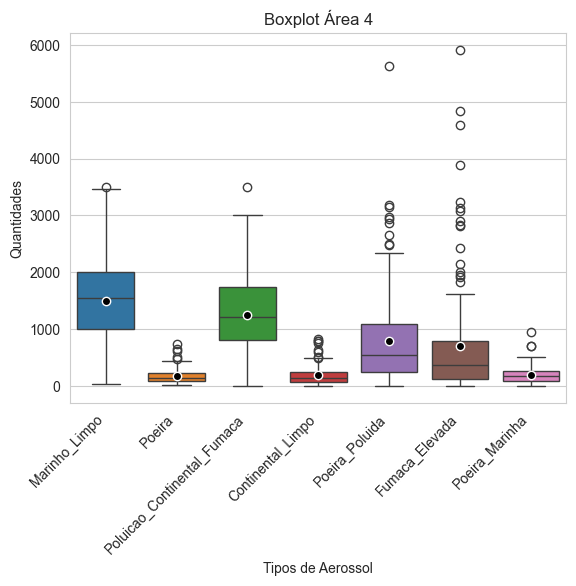

C:\Users\amori\AppData\Local\Temp\ipykernel_17092\510178755.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


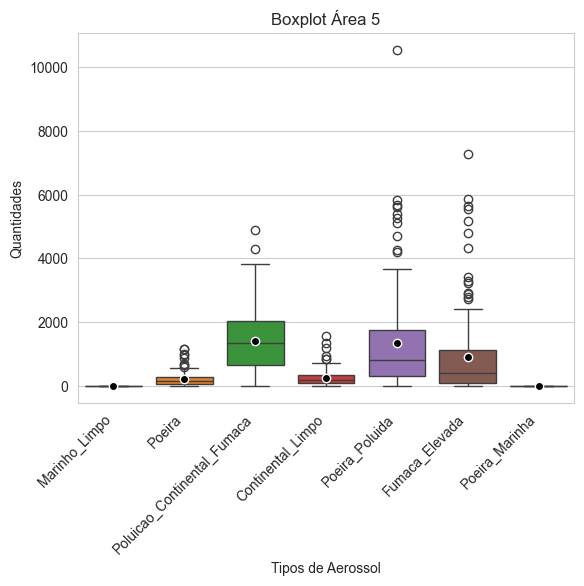

In [116]:
for i,schema in enumerate(schemas):
    # Puxando os dados:
    cursor.execute(f"USE {schema}")
    cursor.execute('SELECT * FROM aerosol_type;')
    
    ## Recupere os resultados da consulta
    tabela = cursor.fetchall()
    
    ## Recupere os nomes das colunas
    columns = [col[0] for col in cursor.description]
    
    ## Crie um DataFrame a partir dos resultados
    df = pd.DataFrame(tabela,columns=columns).drop('id',axis=1).set_index('Data')

    # Gerando Visualização:
    ## Crie um gráfico de caixa (boxplot) usando Seaborn
    sns.set_style("whitegrid")
    # Personalização do símbolo da média
    mean_marker_props = {'marker':'o', 'markerfacecolor':'black', 'markeredgecolor':'white'}
    ax = sns.boxplot(data=df, showmeans=True, meanprops=mean_marker_props)  # Adicionando pontos de dados (médias)
    
    ## Ajustes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.title(f"Boxplot Área {i+1}")
    plt.xlabel("Tipos de Aerossol")
    plt.ylabel("Quantidades")

    
    ## Exibindo o gráfico
    plt.show()

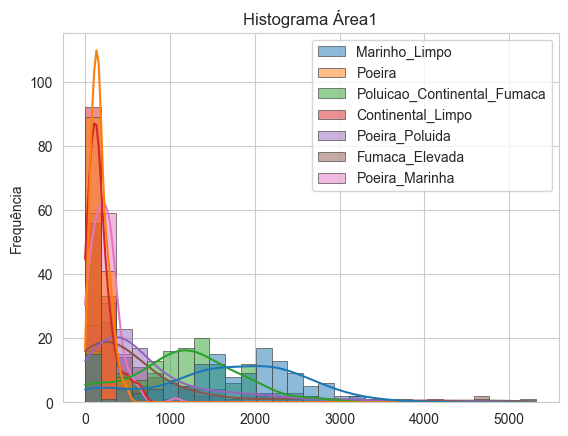

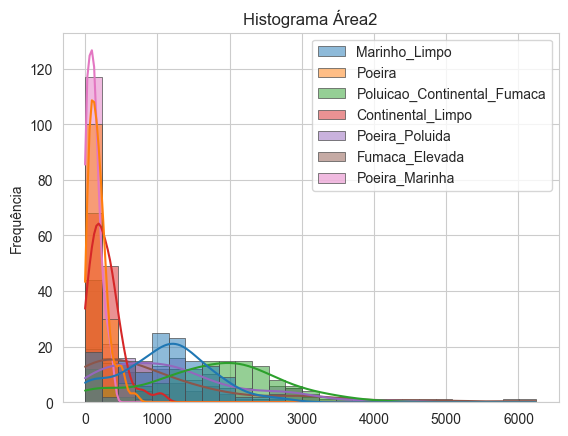

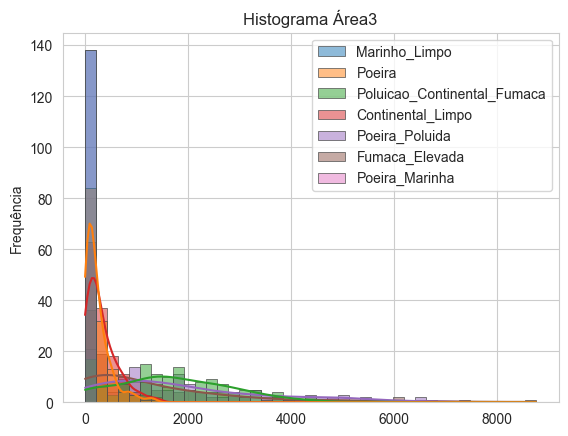

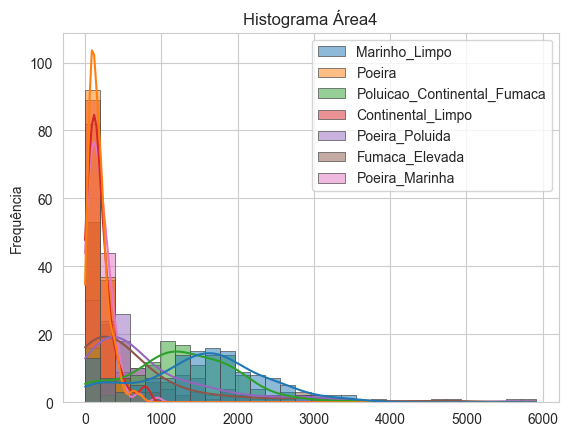

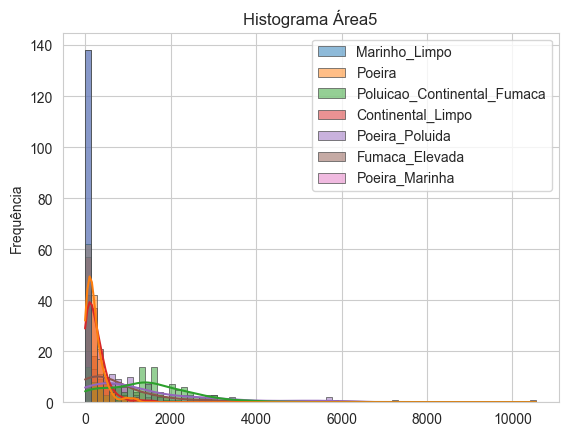

In [110]:
for i,schema in enumerate(schemas):
    # Puxando os dados:
    cursor.execute(f"USE {schema}")
    cursor.execute('SELECT * FROM aerosol_type;')
    
    ## Recupere os resultados da consulta
    tabela = cursor.fetchall()
    
    ## Recupere os nomes das colunas
    columns = [col[0] for col in cursor.description]
    
    ## Crie um DataFrame a partir dos resultados
    df = pd.DataFrame(tabela,columns=columns).drop('id',axis=1).set_index('Data')

    # Gerando Visualização:
    ## Crie um gráfico de caixa (boxplot) usando Seaborn
    sns.set_style("whitegrid")
    ax = sns.histplot(data=df, kde=True,
                      edgecolor=".3",
                      linewidth=.5,)
    
    ## Ajustes:
    plt.title(f"Histograma Área{i+1}")
    #plt.xlabel("Tipos de Aerossol")
    plt.ylabel("Frequência")

    
    ## Exibindo o gráfico
    plt.show()

0it [00:00, ?it/s]

Schema = l3_vfm_a1


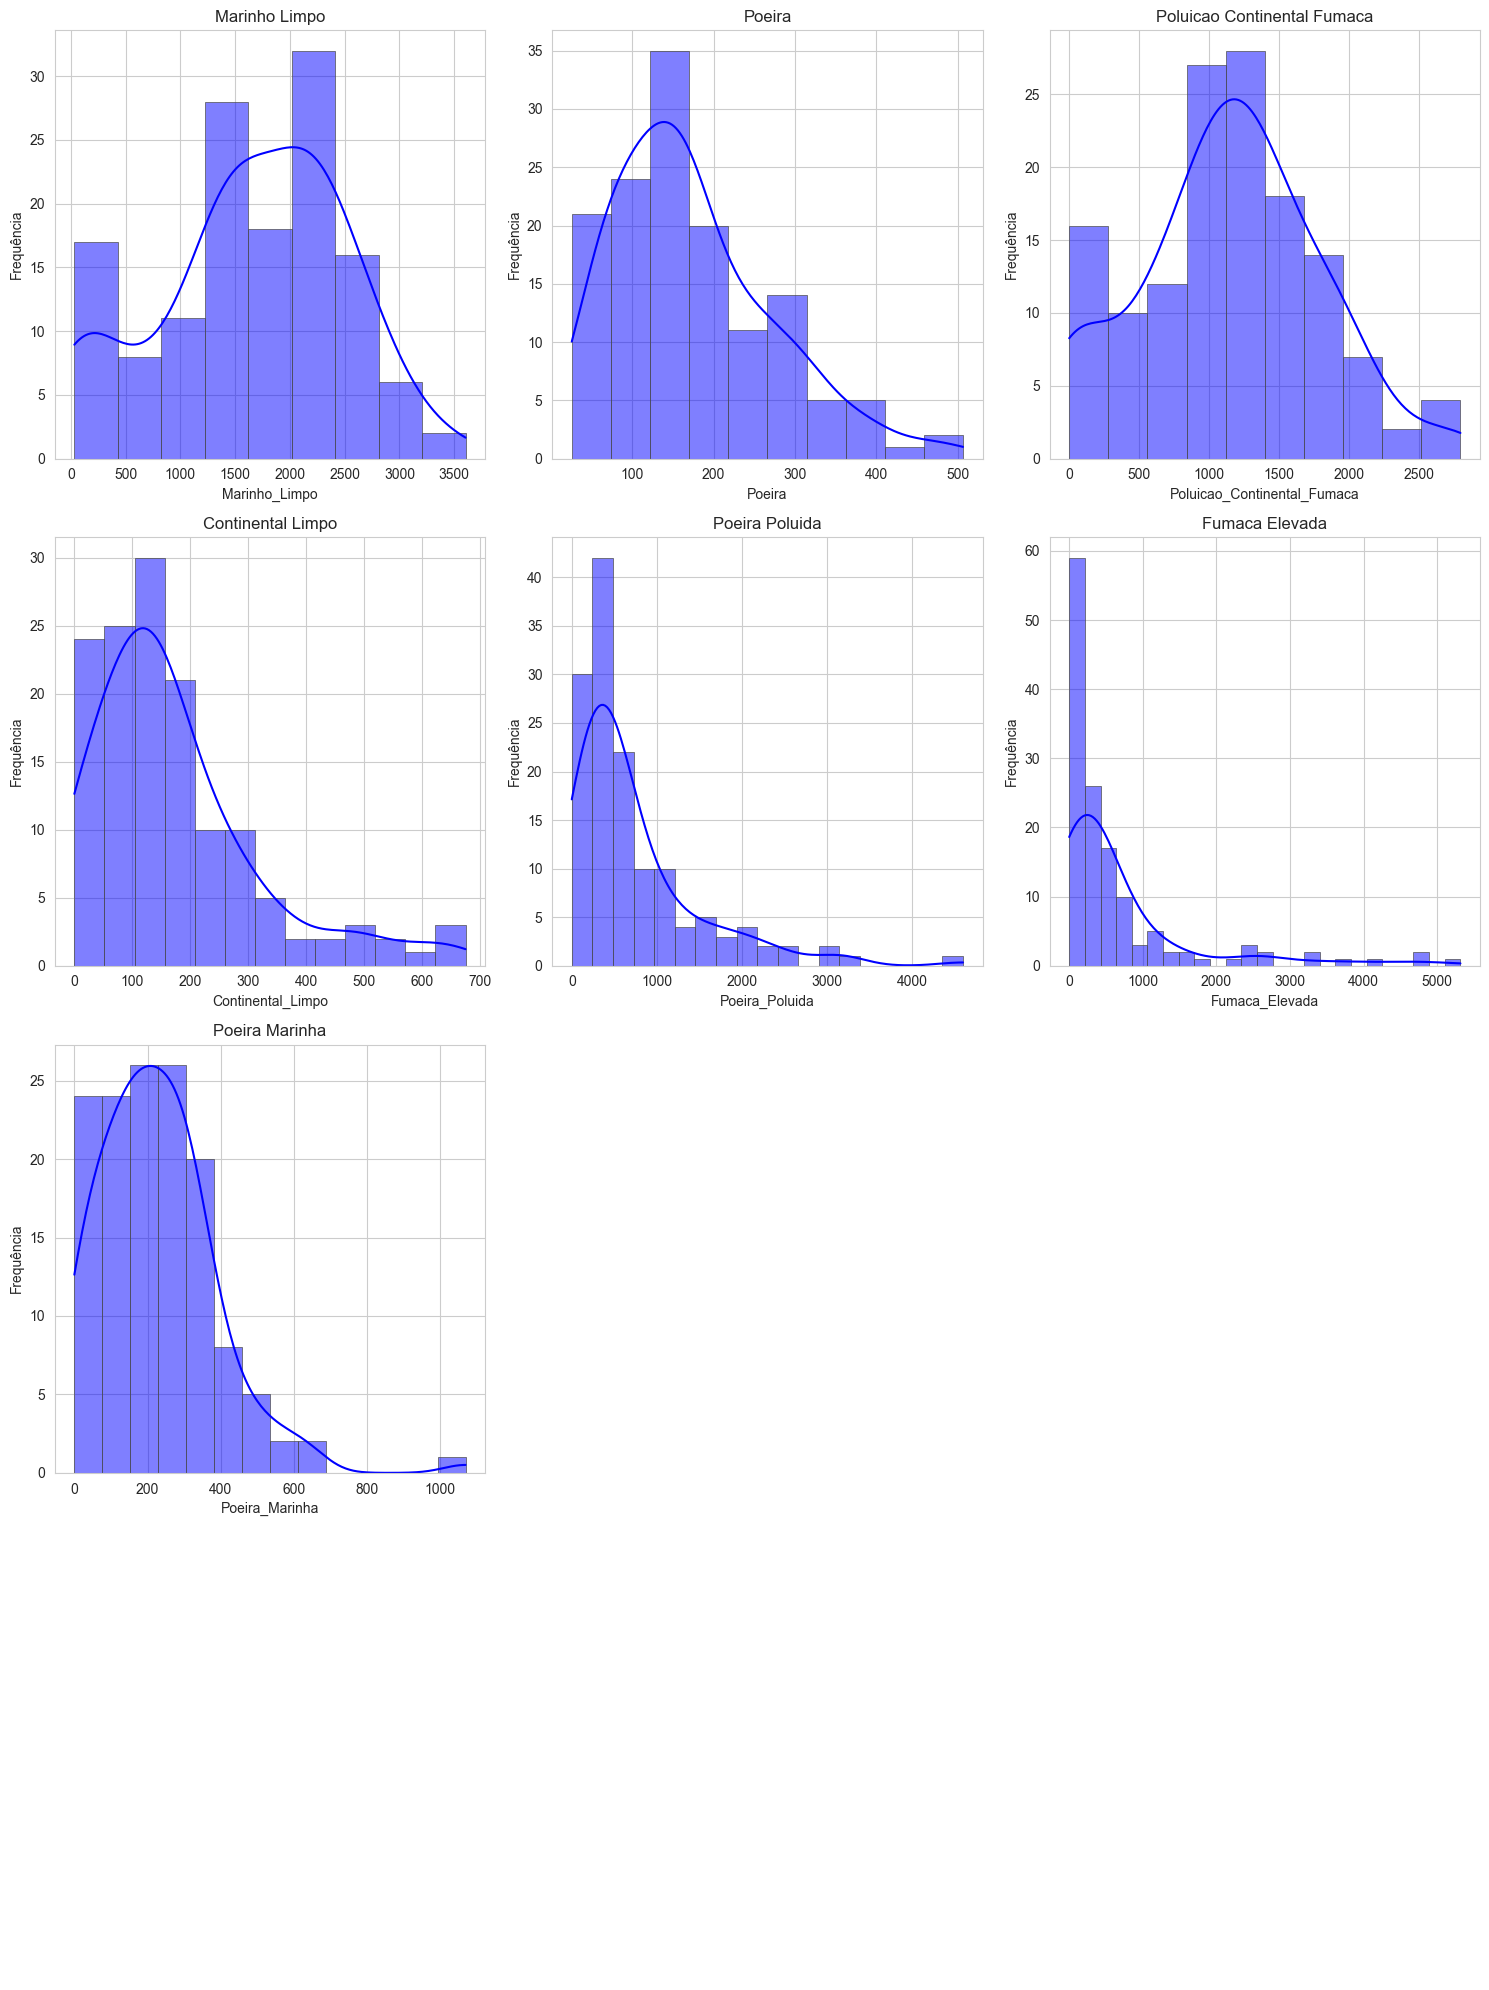

1it [00:02,  2.17s/it]

Schema = l3_vfm_a2


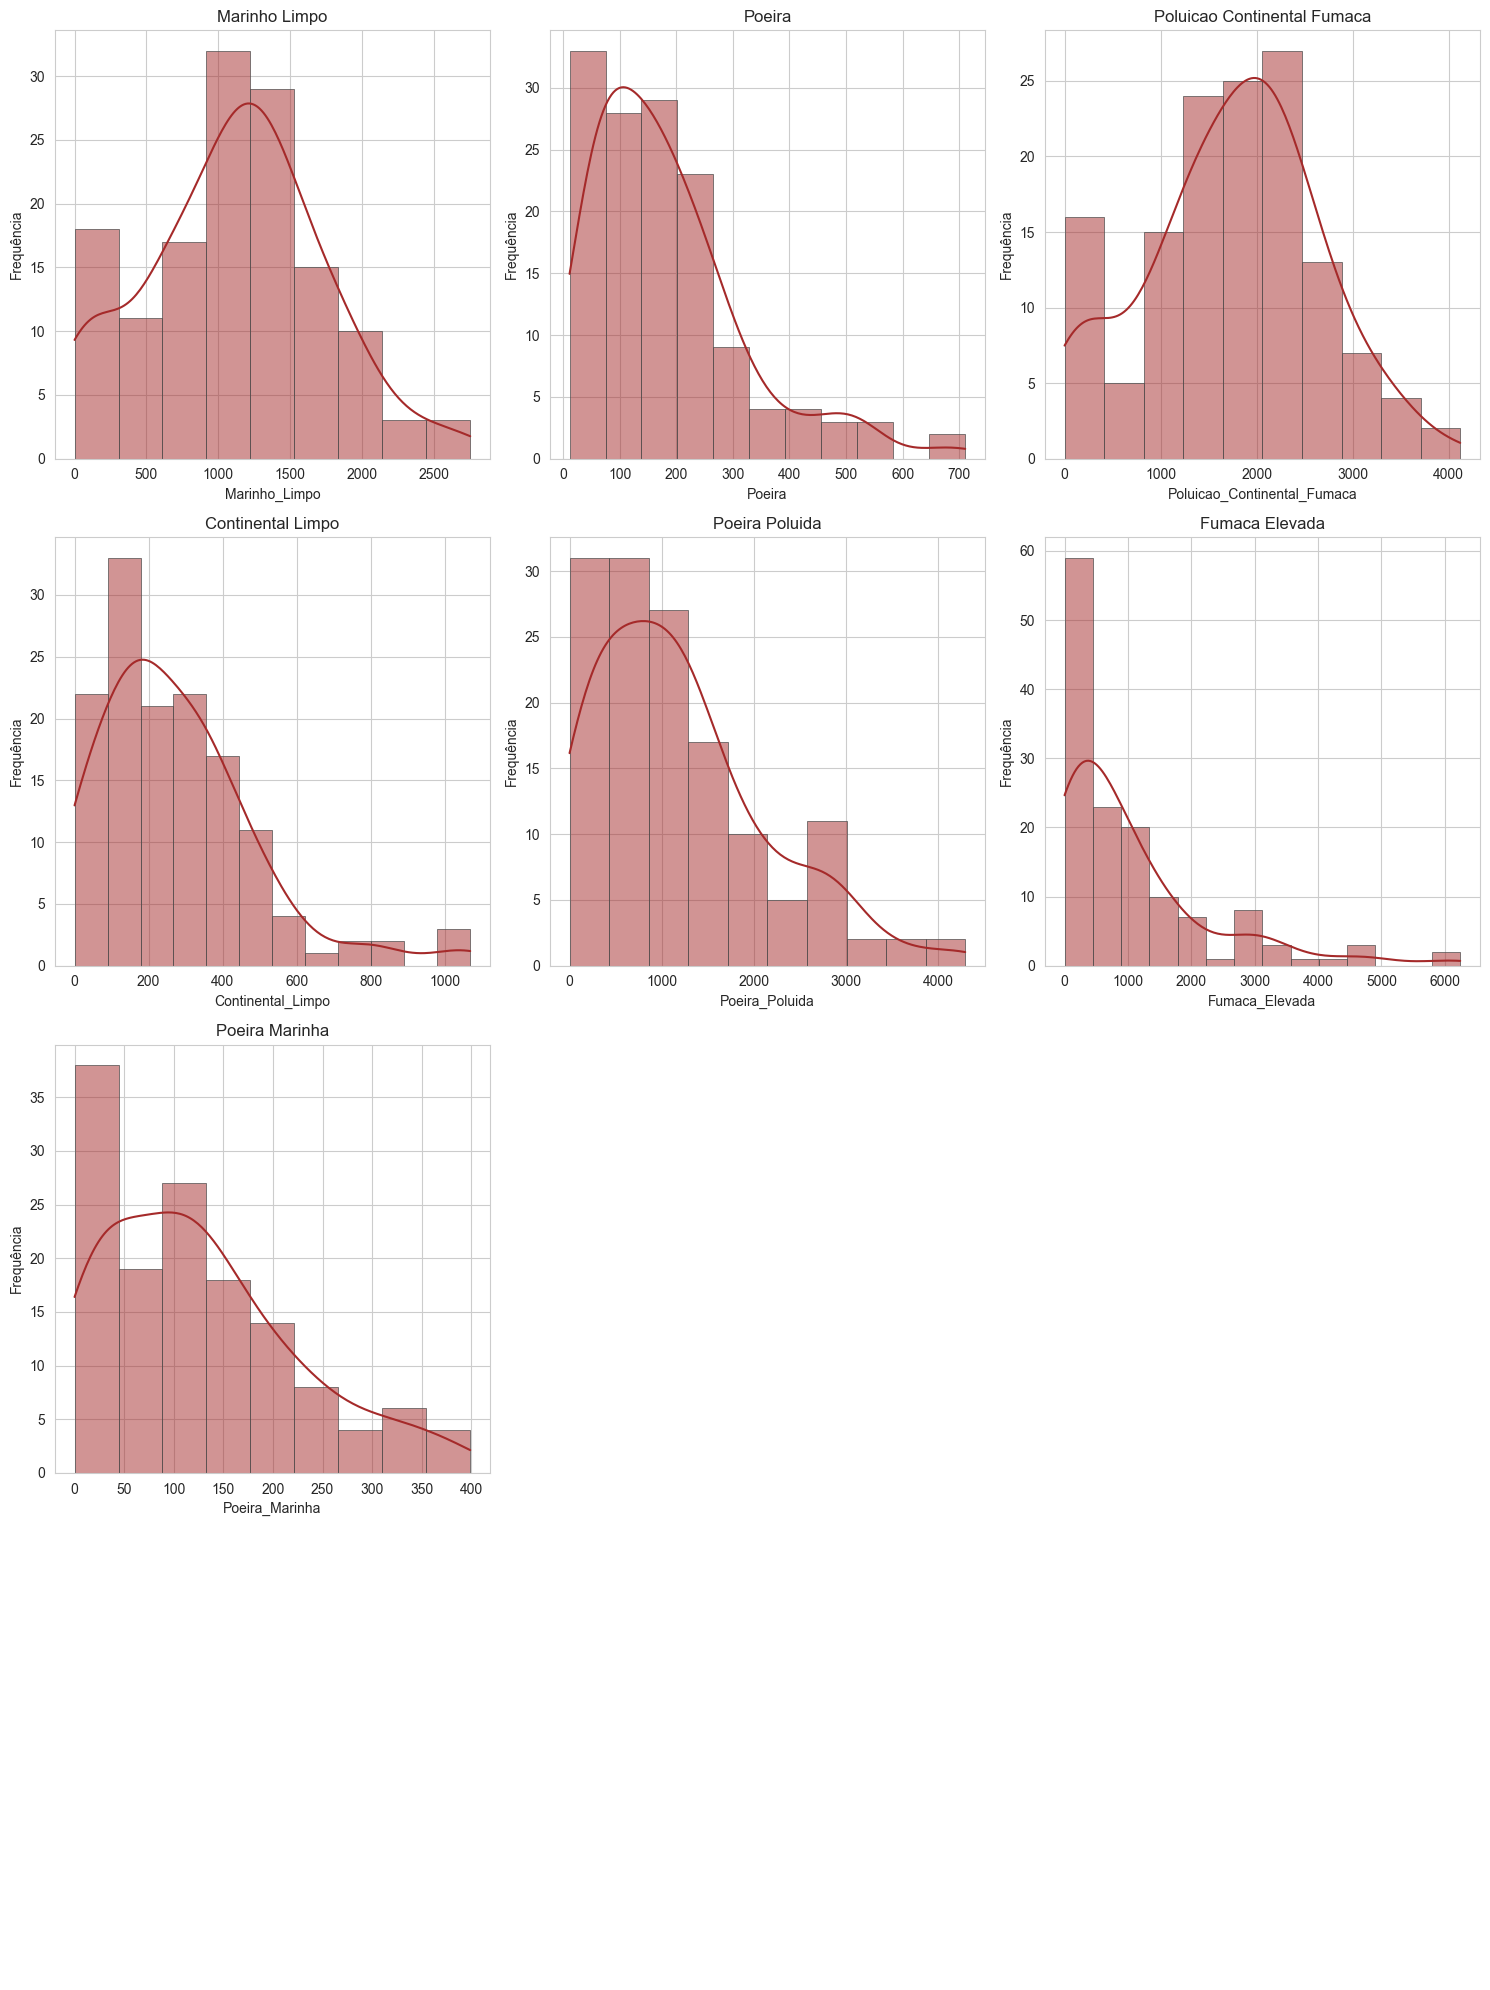

2it [00:04,  2.28s/it]

Schema = l3_vfm_a3


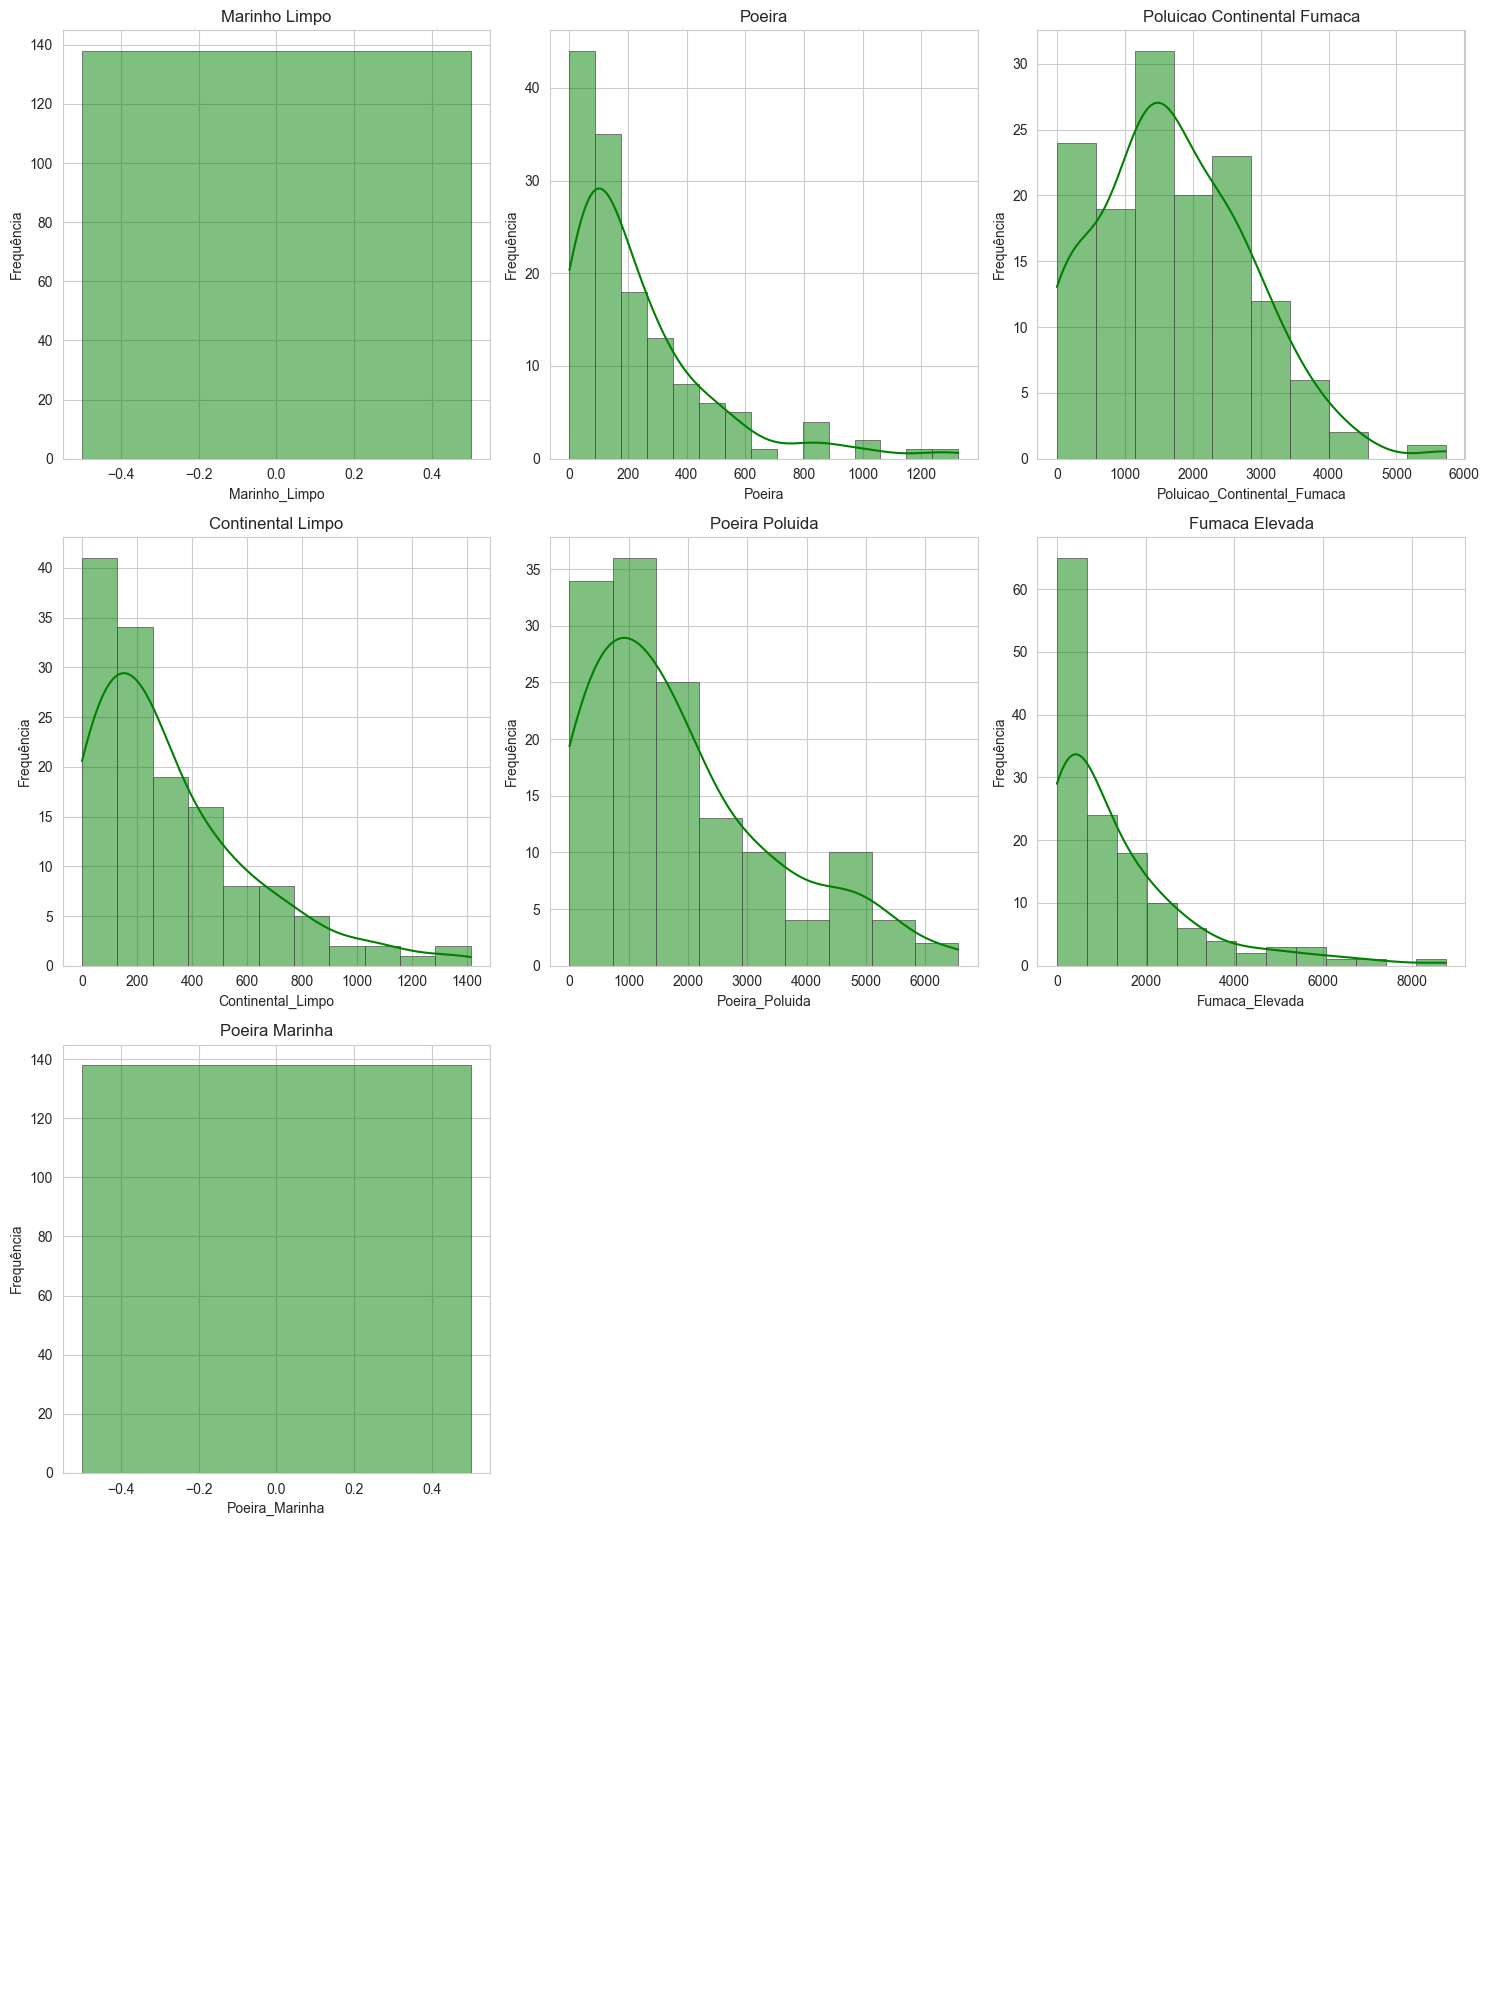

3it [00:06,  2.21s/it]

Schema = l3_vfm_a4


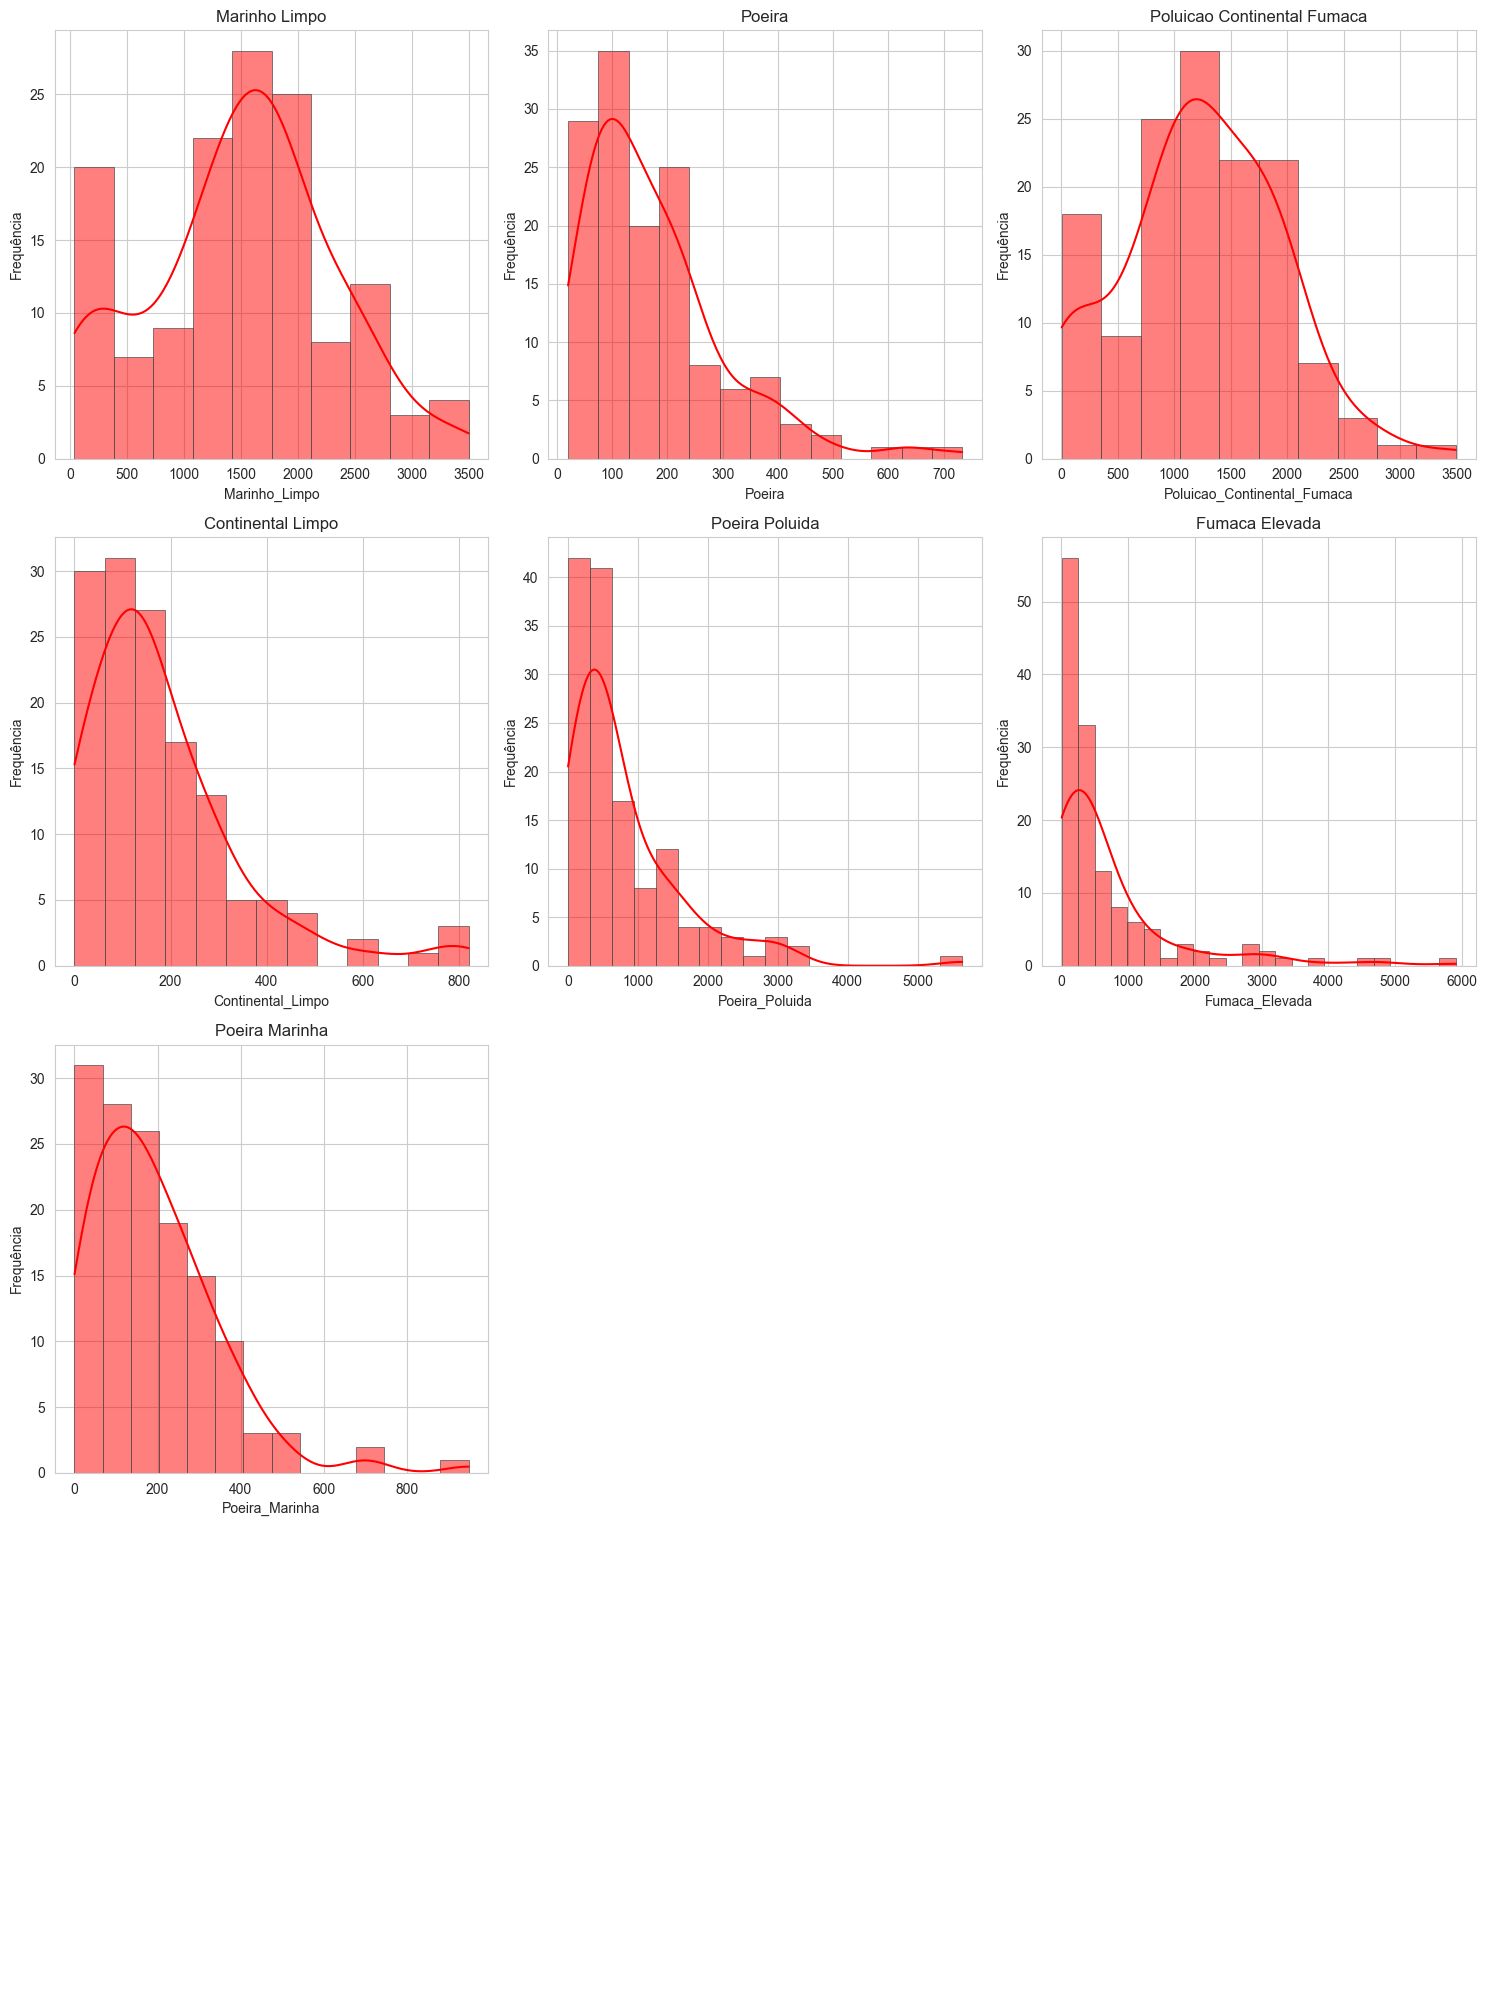

4it [00:08,  2.21s/it]

Schema = l3_vfm_a5


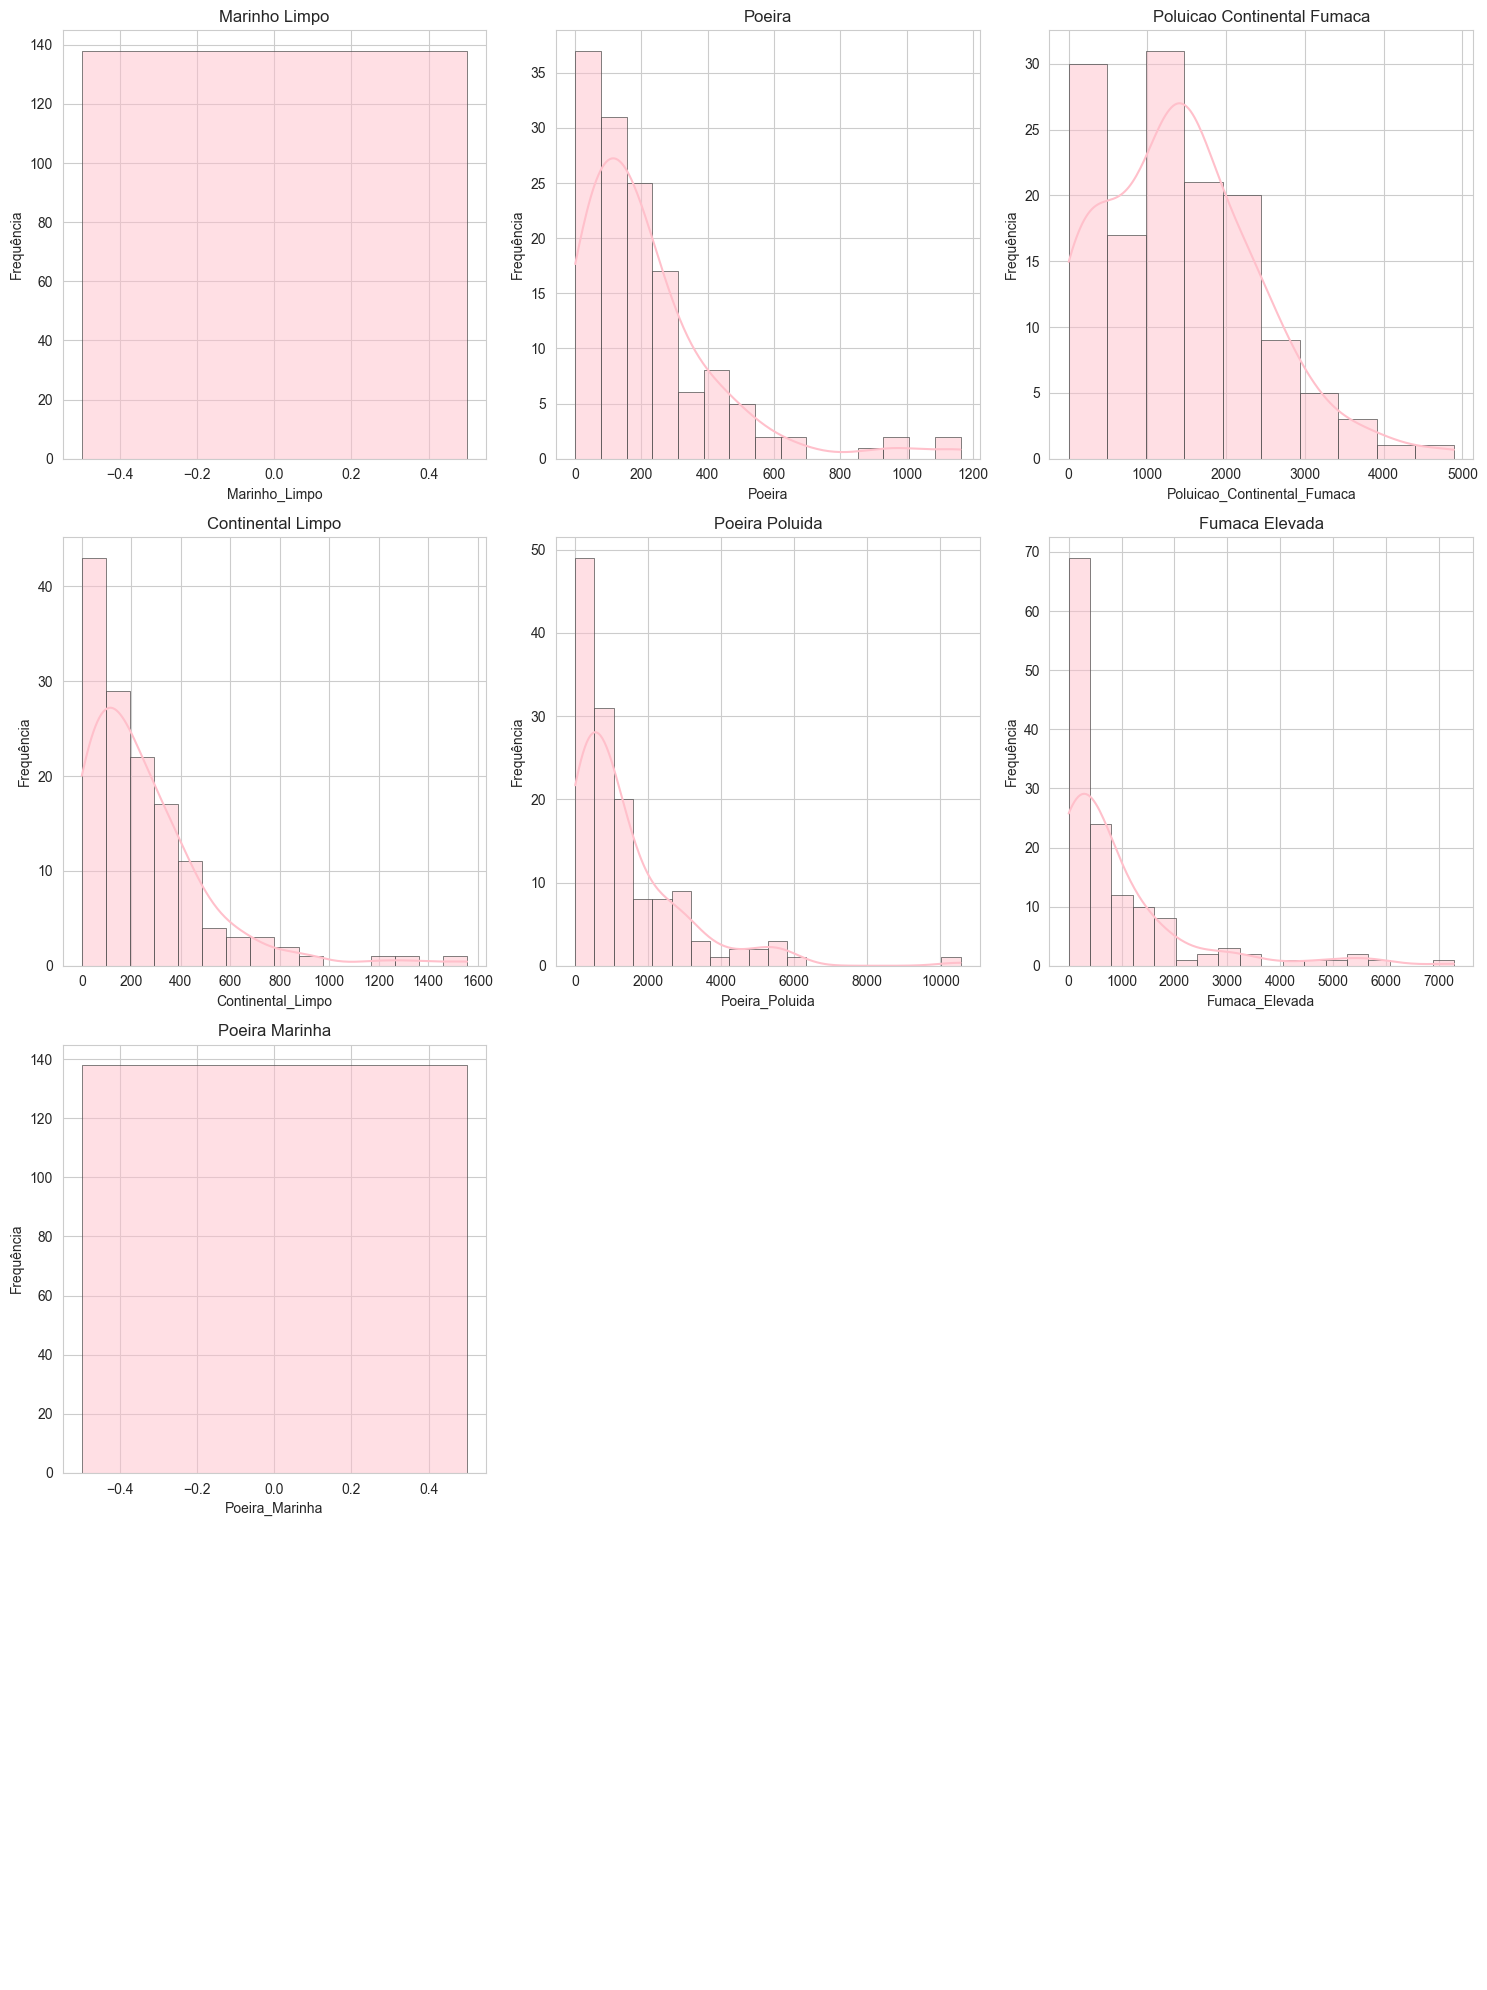

5it [00:11,  2.25s/it]


In [102]:
# Definindo paletas de cores para cada tabela
paletas_cores = [
    'blue',
    'brown',
    'green',
    'red',
    'pink',
]

for j, schema in tqdm(enumerate(schemas)):
    print(f'Schema = {schema}')
    # Puxando os dados:
    cursor.execute(f"USE {schema}")
    cursor.execute('SELECT * FROM aerosol_type;')
    
    ## Recupere os resultados da consulta
    tabela = cursor.fetchall()
    
    ## Recupere os nomes das colunas
    columns = [col[0] for col in cursor.description]
    
    ## Crie um DataFrame a partir dos resultados
    df = pd.DataFrame(tabela,columns=columns).drop('id',axis=1).set_index('Data')


    # Definindo o número de linhas e colunas
    num_rows = 4
    num_cols = 3
    
    # Criando a figura e os subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 20))
    
    # Achatando os subplots para facilitar a iteração
    axs = axs.flatten()

    # Escolhendo a paleta de cores para a tabela atual
    cor = paletas_cores[j]
    
    # Iterando sobre as variáveis e plotando os gráficos
    for i, var in enumerate(df.columns):
        # Plotando o gráfico de histograma
        sns.histplot(data=df[var], kde=True, edgecolor=".3", linewidth=.5, ax=axs[i],color=cor)
        
        # Ajustes
        axs[i].set_title(f"{var.replace('_',' ')}")
        #axs[i].set_xlabel("Tipos de Aerossol")
        axs[i].set_ylabel("Frequência")
    
    # Ocultando subplots vazios (caso o número de gráficos seja menor que o número total de subplots)
    for j in range(len(df.columns), num_rows * num_cols):
        axs[j].axis('off')

    # Ajustando o layout
    plt.tight_layout()
    
    # Exibindo os gráficos
    plt.show()

C:\Users\amori\AppData\Local\Temp\ipykernel_17092\1150373340.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


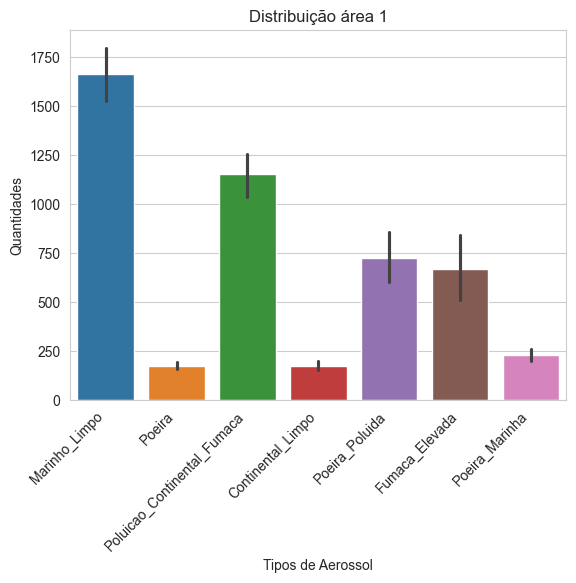

C:\Users\amori\AppData\Local\Temp\ipykernel_17092\1150373340.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


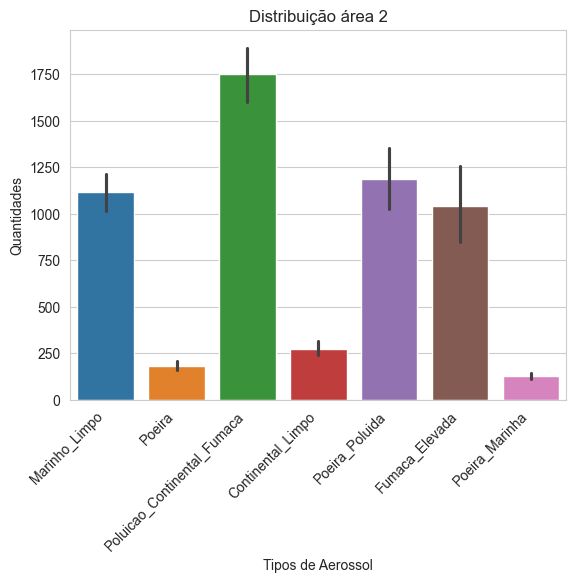

C:\Users\amori\AppData\Local\Temp\ipykernel_17092\1150373340.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


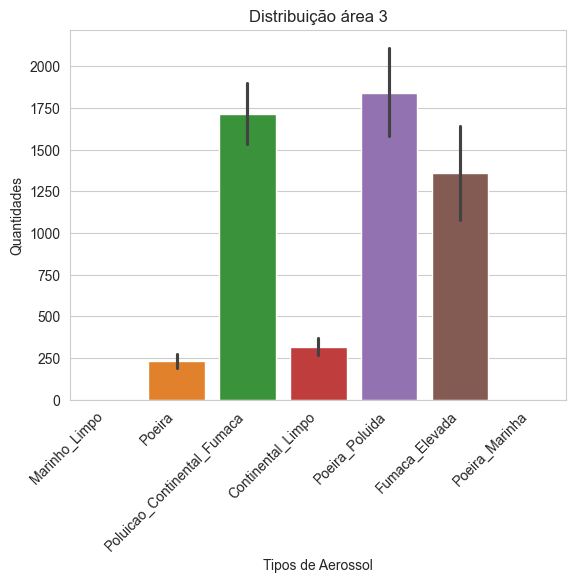

C:\Users\amori\AppData\Local\Temp\ipykernel_17092\1150373340.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


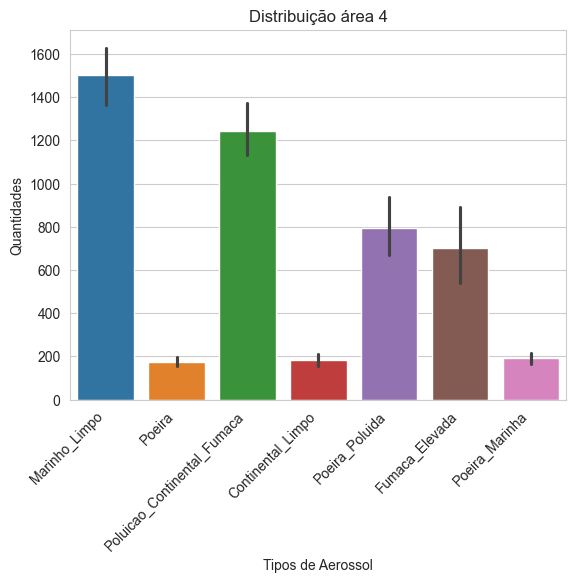

C:\Users\amori\AppData\Local\Temp\ipykernel_17092\1150373340.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


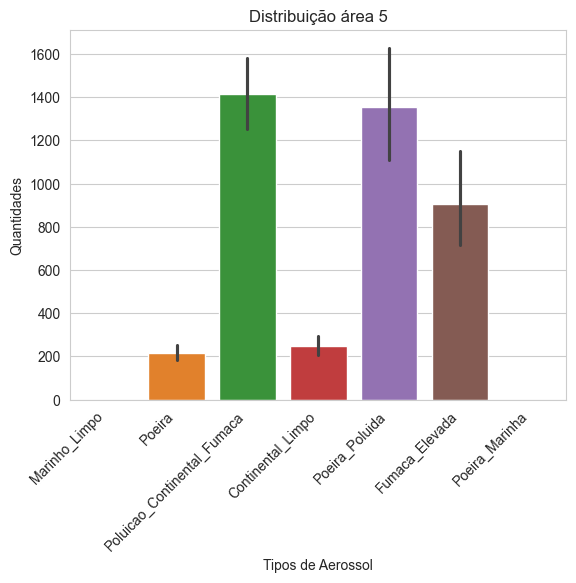

In [105]:
for i,schema in enumerate(schemas):
    # Puxando os dados:
    cursor.execute(f"USE {schema}")
    cursor.execute('SELECT * FROM aerosol_type;')
    
    ## Recupere os resultados da consulta
    tabela = cursor.fetchall()
    
    ## Recupere os nomes das colunas
    columns = [col[0] for col in cursor.description]
    
    ## Crie um DataFrame a partir dos resultados
    df = pd.DataFrame(tabela,columns=columns).drop('id',axis=1).set_index('Data')

    # Gerando Visualização:
    ## Crie um gráfico de caixa (boxplot) usando Seaborn
    sns.set_style("whitegrid")
    ax = sns.barplot(data=df)
    
    ## Ajustes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    #plt.xlabel(
    plt.title(f"Distribuição área {i+1}")
    plt.xlabel("Tipos de Aerossol")
    plt.ylabel("Quantidades")

    
    ## Exibindo o gráfico
    plt.show()

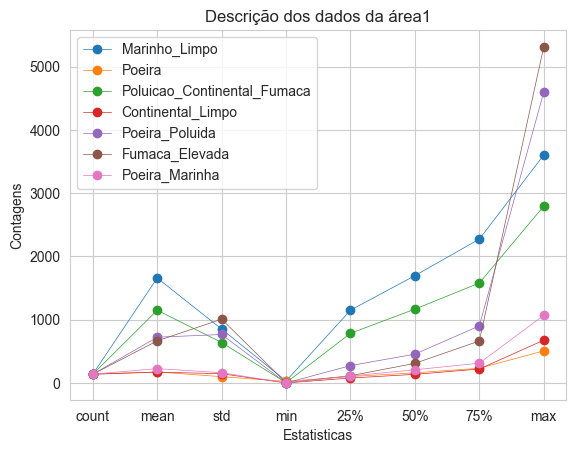

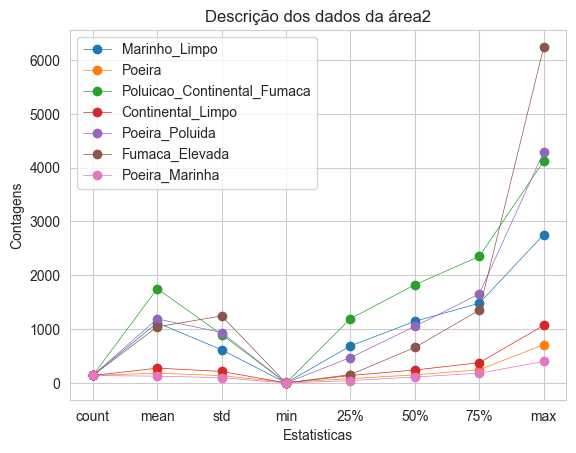

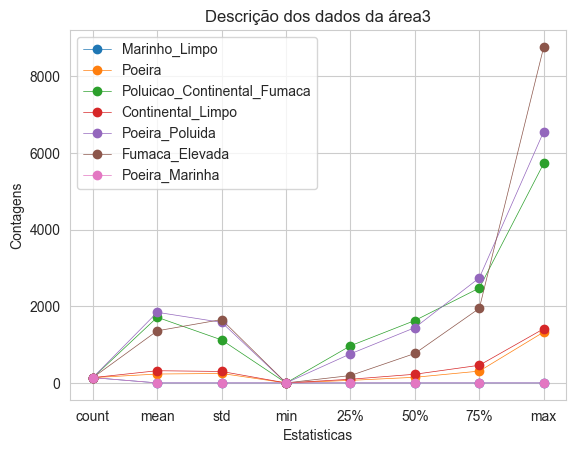

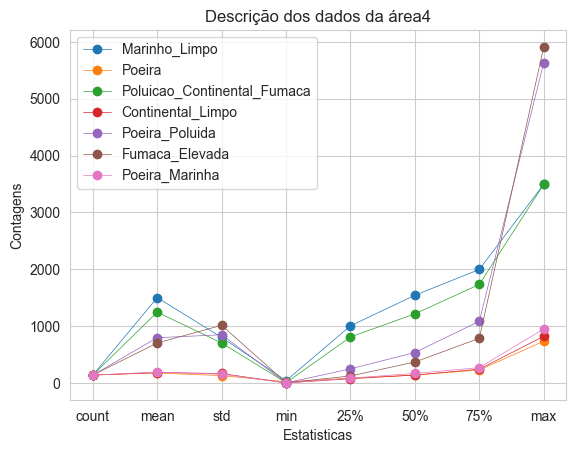

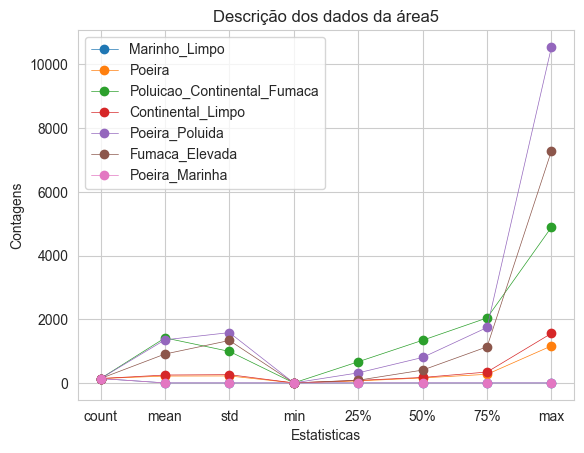

In [104]:
for i,schema in enumerate(schemas):
    # Puxando os dados:
    cursor.execute(f"USE {schema}")
    cursor.execute('SELECT * FROM aerosol_type;')
    
    ## Recupere os resultados da consulta
    tabela = cursor.fetchall()
    
    ## Recupere os nomes das colunas
    columns = [col[0] for col in cursor.description]
    
    ## Crie um DataFrame a partir dos resultados
    df = pd.DataFrame(tabela,columns=columns).drop('id',axis=1).set_index('Data')

    # Gerando Visualização:
    df.describe().plot(marker='o',linewidth=0.5,title=f'Descrição dos dados da área{i+1}',xlabel='Estatisticas',ylabel='Contagens')
    plt.show()

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.28422108, 0.39381393, 0.35284335, 0.37187737, 0.4042663 ,
        0.37573414, 0.30499995, 0.36469127, 0.48027047, 0.44970974,
        0.37147151, 0.27570689, 0.25428379, 0.35799515, 0.44583034,
        0.36025058, 0.37272507, 0.43160842, 0.38128947, 0.36214386,
        0.36660477]),
 <matplotlib.lines.Line2D at 0x234b8601760>)

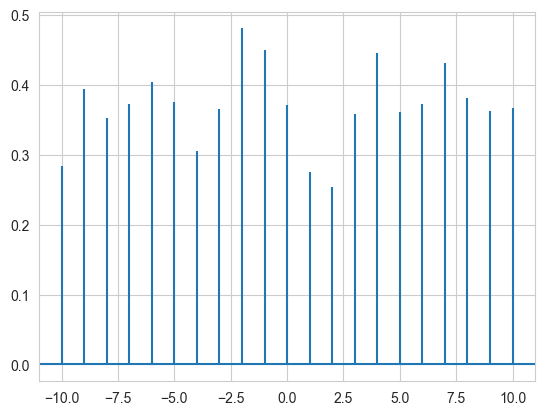

In [69]:
plt.xcorr(df_teste['Poluicao_Continental_Fumaca'],df_teste['Fumaca_Elevada'])

## aod_mean

In [3]:
cursor.execute('SELECT * FROM aod_mean;')

# Recupere os resultados da consulta
tabela = cursor.fetchall()

# Recupere os nomes das colunas
columns = [col[0] for col in cursor.description]

# Crie um DataFrame a partir dos resultados
aod_mean = pd.DataFrame(tabela,columns=columns).set_index('Data');aod_mean

,Valores
Data,
2006-06,0.110947
2006-07,0.065967
2006-08,0.080245
2006-09,0.123775
2006-10,0.039216
...,...
2021-07,0.013541
2021-08,0.011038
2021-09,0.002509


<Axes: xlabel='Data'>

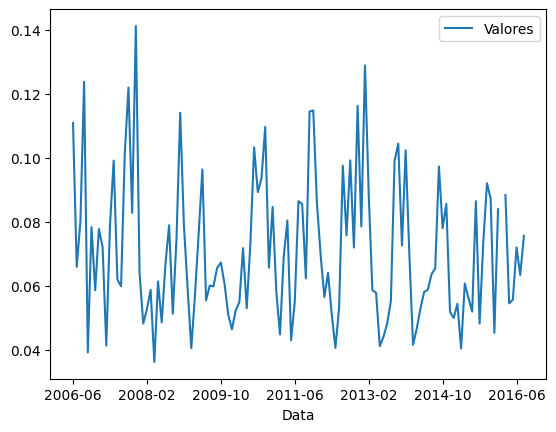

In [6]:
aod_mean[:'2017'].plot()

<Axes: ylabel='Count'>

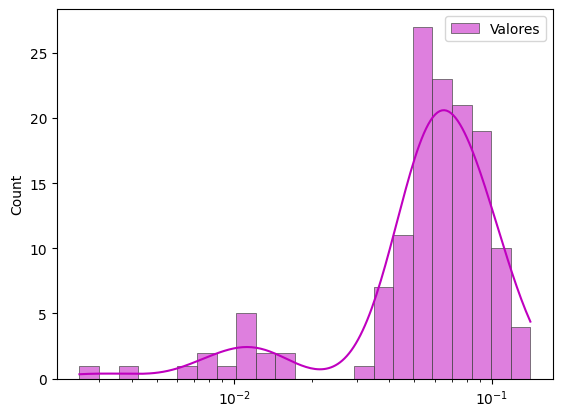

In [19]:
sns.histplot(
    aod_mean,
    kde=True,
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)

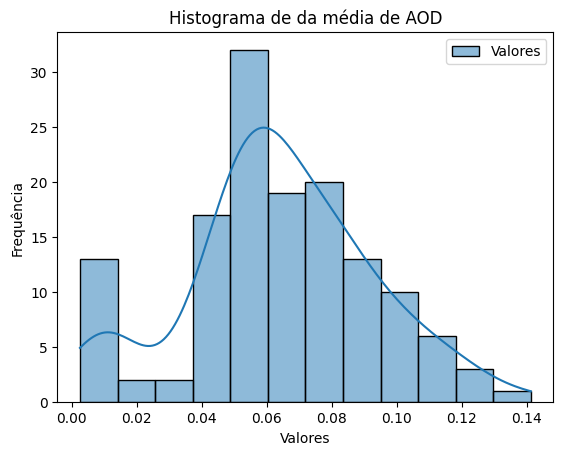

In [15]:
# Criar um histograma com KDE
sns.histplot(aod_mean, kde=True)

# Adicionar rótulo ao eixo x
plt.xlabel('Valores')
plt.ylabel('Frequência')

# Adicionar título ao gráfico
plt.title('Histograma de da média de AOD')

# Exibir o gráfico
plt.show()

## extinction_coefficient_532_mean

In [24]:
cursor.execute('SELECT * FROM extinction_coefficient_532_mean;')

# Recupere os resultados da consulta
tabela = cursor.fetchall()

# Recupere os nomes das colunas
columns = [col[0] for col in cursor.description]

# Crie um DataFrame a partir dos resultados
ext_coef = pd.DataFrame(tabela,columns=columns).drop('id',axis=1);ext_coef

,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,...,2021-02,2021-03,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002398,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001549,0.002081
204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003275,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.001812,0.001914
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002666,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.001411,0.006079
206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001515,0.0,0.0,0.0,0.0,0.0,0.001442,0.0,0.001352,0.006054


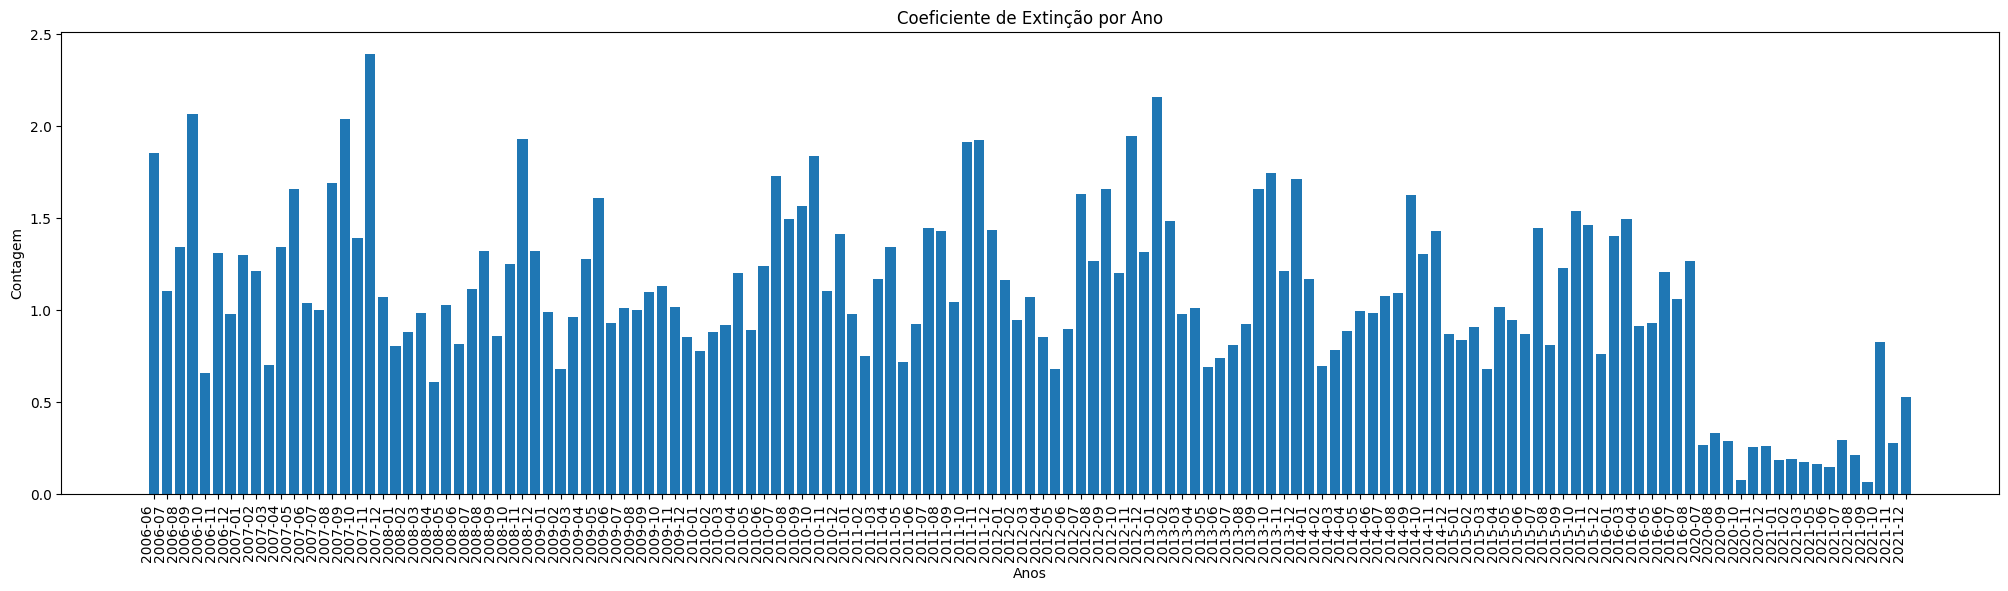

In [54]:
# Calcular a soma dos valores em cada coluna
somas_por_coluna = ext_coef.sum()

# Ajustar o tamanho do plot
plt.figure(figsize=(25, 6))

# Criar o gráfico de barras
plt.bar(somas_por_coluna.index, somas_por_coluna.values)

# Adicionar rótulos ao eixo x e y
plt.xlabel('Anos')
plt.ylabel('Contagem')

# Adicionar título ao gráfico
plt.title('Coeficiente de Extinção por Ano')

# Rotacionar os rótulos do eixo x para melhor legibilidade (opcional)
plt.xticks(rotation=90, ha='right')

# Exibir o gráfico
plt.show()

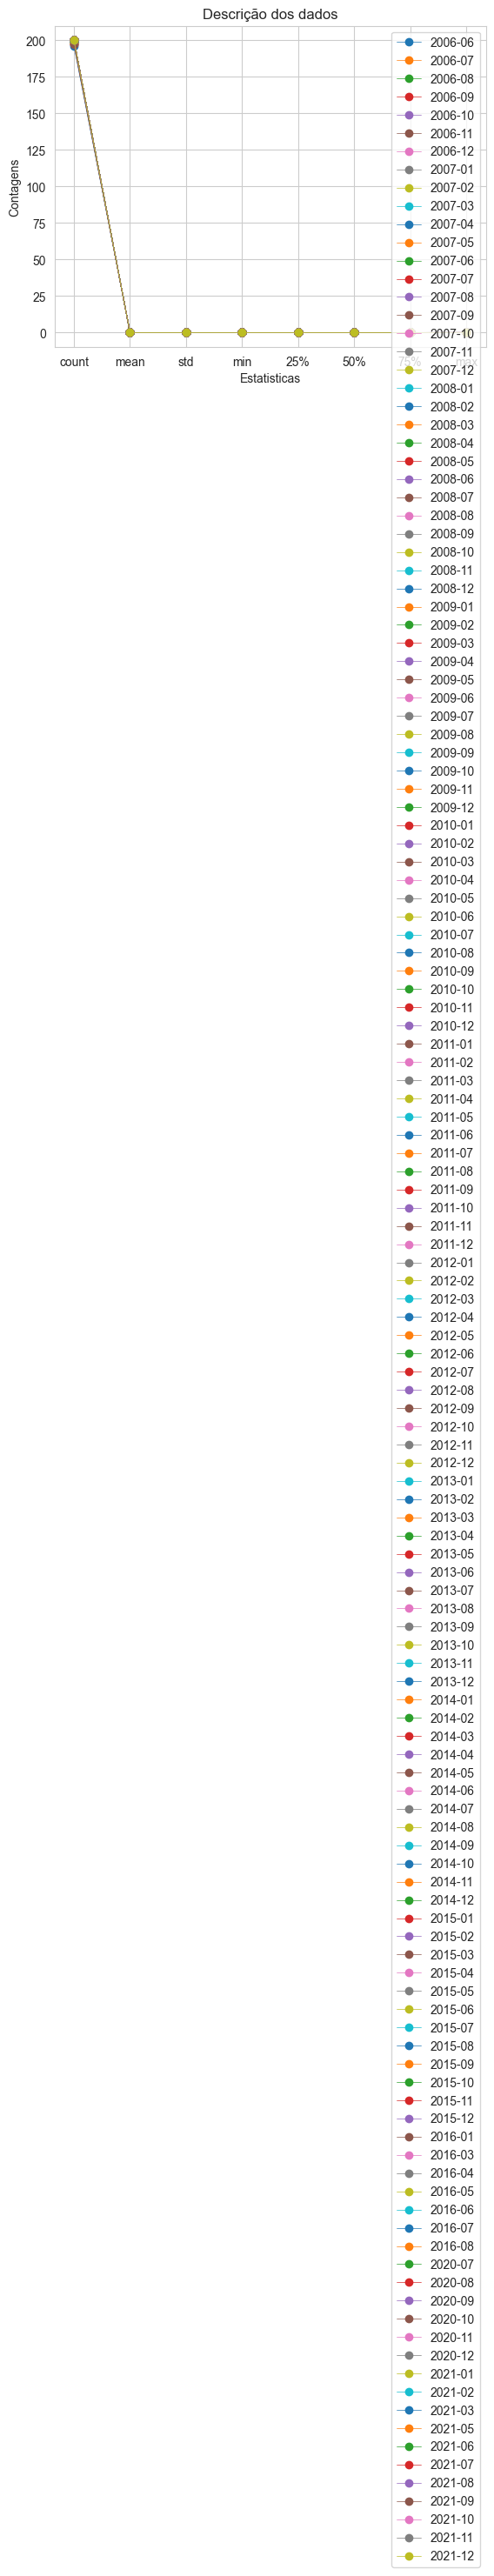

In [97]:
ext_coef.describe().plot(marker='o',linewidth=0.5,title='Descrição dos dados',xlabel='Estatisticas',ylabel='Contagens')
plt.show()

In [111]:
df

,Marinho_Limpo,Poeira,Poluicao_Continental_Fumaca,Continental_Limpo,Poeira_Poluida,Fumaca_Elevada,Poeira_Marinha
Data,,,,,,,
2006-06,0.0,94.5,703.5,220.0,1425.5,775.5,0.0
2006-07,0.0,9.5,678.0,82.0,829.0,208.0,0.0
2006-08,0.0,228.5,2541.0,447.0,773.0,1243.0,0.0
2006-09,0.0,117.5,2765.0,154.0,3147.0,907.0,0.0
2006-10,0.0,44.0,499.5,231.5,646.5,709.5,0.0
...,...,...,...,...,...,...,...
2021-07,0.0,39.0,242.0,0.0,0.0,208.5,0.0
2021-08,0.0,107.0,5.0,0.0,30.5,0.0,0.0
2021-09,0.0,25.0,183.0,0.0,89.0,40.0,0.0
